In [1]:
# Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')
%matplotlib inline

# the data
from sklearn import datasets

# for the model
from sklearn.cluster import KMeans

# the check
from sklearn.metrics import silhouette_score

In [2]:
# loading the iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


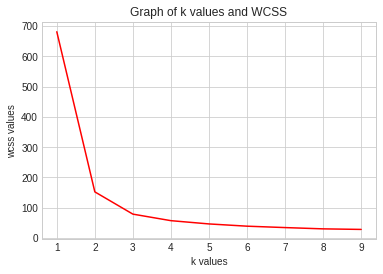

In [3]:
wcss = [] #inertia (within cluster sum square) or total spread

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), wcss, color='red')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

In [4]:
# The optimum value for k seems to be 3. Let's try

m1 = KMeans(n_clusters=3,random_state=42)
m1.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [5]:
from collections import Counter
Counter(m1.labels_)

Counter({0: 62, 1: 50, 2: 38})

In [6]:
m1.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [7]:
m1.inertia_

78.85144142614601

In [8]:
silhouette_score(df,m1.labels_)

0.5528190123564091

In [9]:
y_kmeans = m1.labels_

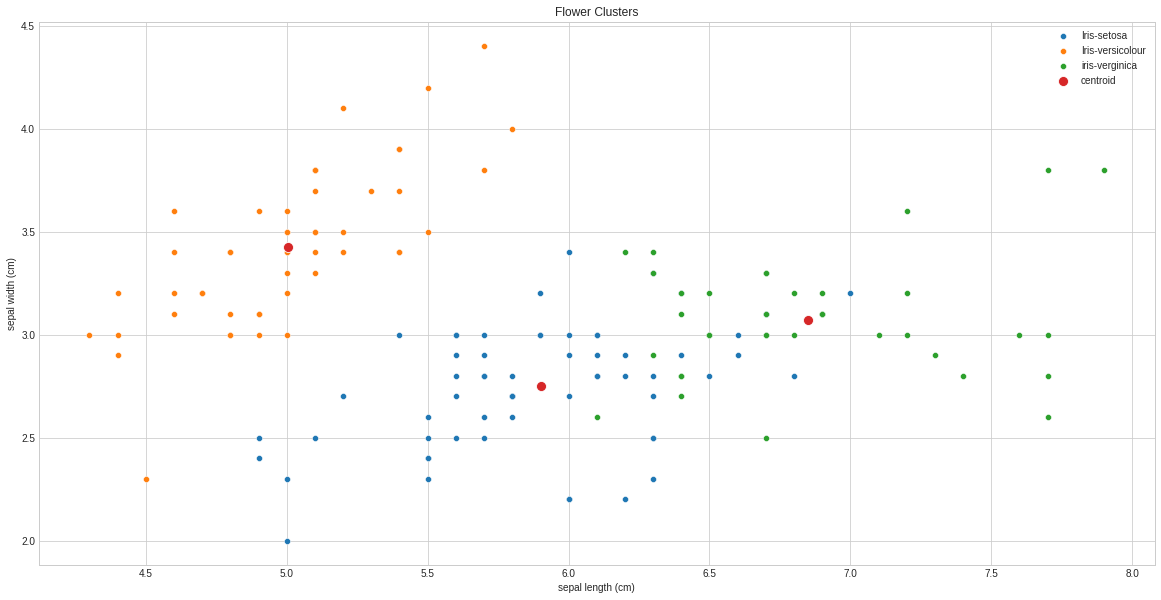

In [38]:
plt.figure(figsize=(20,10))
# Visualising the clusters - On the first two columns
sns.scatterplot(x=df[y_kmeans==0]['sepal length (cm)'],y=df['sepal width (cm)'],label='Iris-setosa')
sns.scatterplot(x=df[y_kmeans==1]['sepal length (cm)'],y=df['sepal width (cm)'],label='Iris-versicolour')
sns.scatterplot(x=df[y_kmeans==2]['sepal length (cm)'],y=df['sepal width (cm)'],label='iris-verginica')

# Plotting the centroids of the clusters
sns.scatterplot(x=m1.cluster_centers_[:, 0], y=m1.cluster_centers_[:,1],label='centroid',s=100)

plt.title('Flower Clusters')
plt.legend()
plt.show()